In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math

# Q1 Discrete Fourier Transform

### Define DFT

In [2]:
def DFT(s,M):
    S=[]
    for k in range(M):
        p=0
        for n in range(M):
            y=-2*np.pi*k*n/M
            exp=complex(np.cos(y),np.sin(y))
            p+=s[n]*exp
        S.append(p)
    return S

### Define IDFT

In [3]:
def IDFT(S,M):
    R=[]
    for n in range(M):
        p=0
        for k in range(M):
            y=2j*np.pi*k*n/M
            exp=np.exp(y)
            p+=S[k]*exp
        if p.imag<10**-4:
            p+=np.conj(p)
            p=p/2
        R.append(p/M)
    return R

C:\Users\me\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\me\anaconda3\lib\site-packages\matplotlib\transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


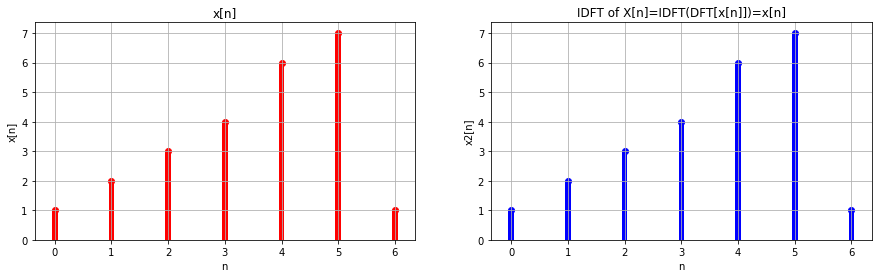

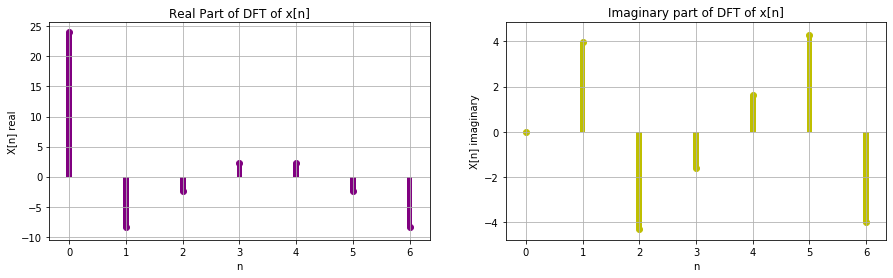

In [4]:
x=np.array([1,2,3,4,6,7,1])
x2=np.empty([len(x)])
N=len(x)
n=np.arange(0,N,1)
X=np.empty([N])
X=DFT(x,N)
x2=IDFT(X,N)
fig=1
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
plt.scatter(n,x,color='r')
plt.bar(n,x,color='r',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x[n]')
fig+=1
plt.subplot(1,2,2)
plt.scatter(n,x2,color='b')
plt.bar(n,x2,color='b',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('x2[n]')
plt.title('IDFT of X[n]=IDFT(DFT[x[n]])=x[n]')
plt.figure(fig,figsize=(15,4))
plt.subplot(1,2,1)
for i in range(len(X)):
    plt.scatter(i,X[i].real,color='purple')
    plt.bar(i,X[i].real,color='purple',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('X[n] real')
plt.title('Real Part of DFT of x[n]')
plt.subplot(1,2,2)
for i in range(len(X)):    
    plt.scatter(i,X[i].imag,color='y')
    plt.bar(i,X[i].imag,color='y',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('X[n] imaginary')
plt.title('Imaginary part of DFT of x[n]')
fig+=1

# Circular Convolution

Write a function to compute the circular convolution of two sequences. Find the circular convolution of x = [1; 2; 3; 0; 0; 0; 0] and h = [1; 1; 1; 1; 1; 1; 1] using the function.

### Def Circular Convolution

In [5]:
def circon(x,y):
    v=[]
    for m in range(len(x)):
        p=0
        for n in range(len(x)):
            if m>=n:
                p+=x[n]*y[m-n]
            else:
                p+=x[n]*y[m-n+len(x)]
        v.append(p)
    return v

Circular convolution of x[n] and h[n] is: [6, 6, 6, 6, 6, 6, 6]


Text(0, 0.5, 'Y[k]')

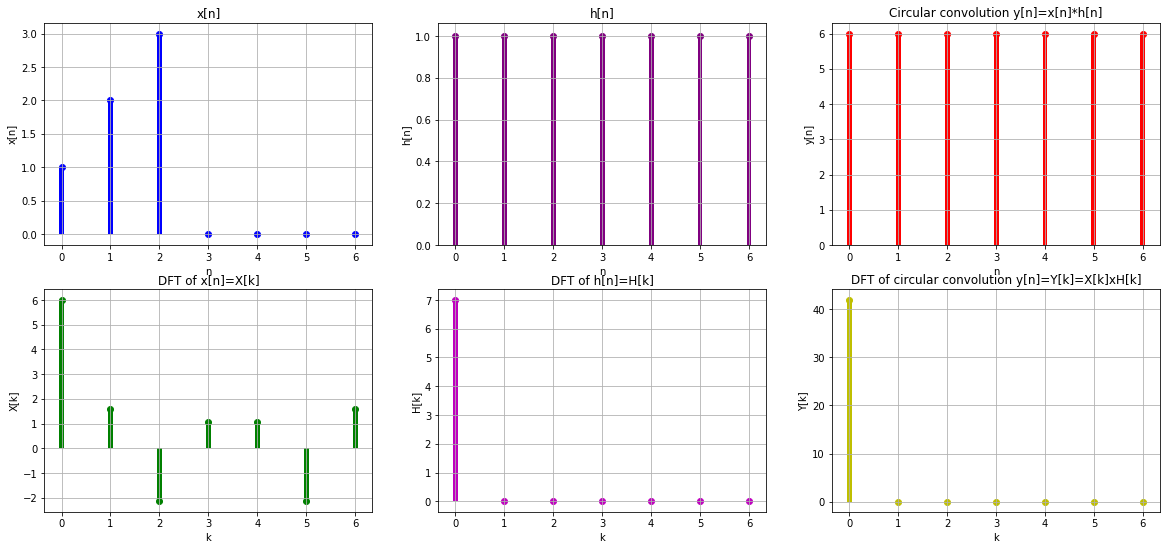

In [6]:
x=np.array([1,2,3,0,0,0,0])
n=np.arange(0,len(x),1)
h=np.array([1,1,1,1,1,1,1])
y=circon(x,h)
X=DFT(x,len(x))
H=DFT(h,len(h))
Y=[]
for i in range(len(x)):
    Y.append(X[i]*H[i])
y2=IDFT(Y,len(Y))
print('Circular convolution of x[n] and h[n] is:',y)
plt.figure(fig,figsize=(20,9))
fig+=1
plt.subplot(2,3,1)
plt.scatter(n,x,color='b')
plt.bar(n,x,color='b',width=0.1)
plt.grid('True')
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.subplot(2,3,2)
plt.scatter(n,h,color='purple')
plt.bar(n,h,color='purple',width=0.1)
plt.title('h[n]')
plt.grid('True')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.subplot(2,3,3)
plt.scatter(n,y,color='r')
plt.title('Circular convolution y[n]=x[n]*h[n]')
plt.bar(n,y,color='r',width=0.1)
plt.grid('True')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.subplot(2,3,4)
plt.scatter(n,X,color='g')
plt.bar(n,X,color='g',width=0.1)
plt.title('DFT of x[n]=X[k]')
plt.grid('True')
plt.xlabel('k')
plt.ylabel('X[k]')
plt.subplot(2,3,5)
plt.scatter(n,H,color='m')
plt.title('DFT of h[n]=H[k]')
plt.bar(n,H,color='m',width=0.1)
plt.grid('True')
plt.xlabel('k')
plt.ylabel('H[k]')
plt.subplot(2,3,6)
plt.scatter(n,Y,color='y')
plt.title('DFT of circular convolution y[n]=Y[k]=X[k]xH[k]')
plt.bar(n,Y,color='y',width=0.1)
plt.grid('True')
plt.xlabel('k')
plt.ylabel('Y[k]')

A signal is given as x(t) = cos2pift where f = 30 Hz. The signal is sampled at 100 times per second for 10 seconds and then its DFT is computed. Plot the spectrum versus frequency in Hz. What is the magnitude of DFT at 35 Hz? Is this value non-zero? If so then why?

The magnitude of DFT at f=35Hz is 2.05


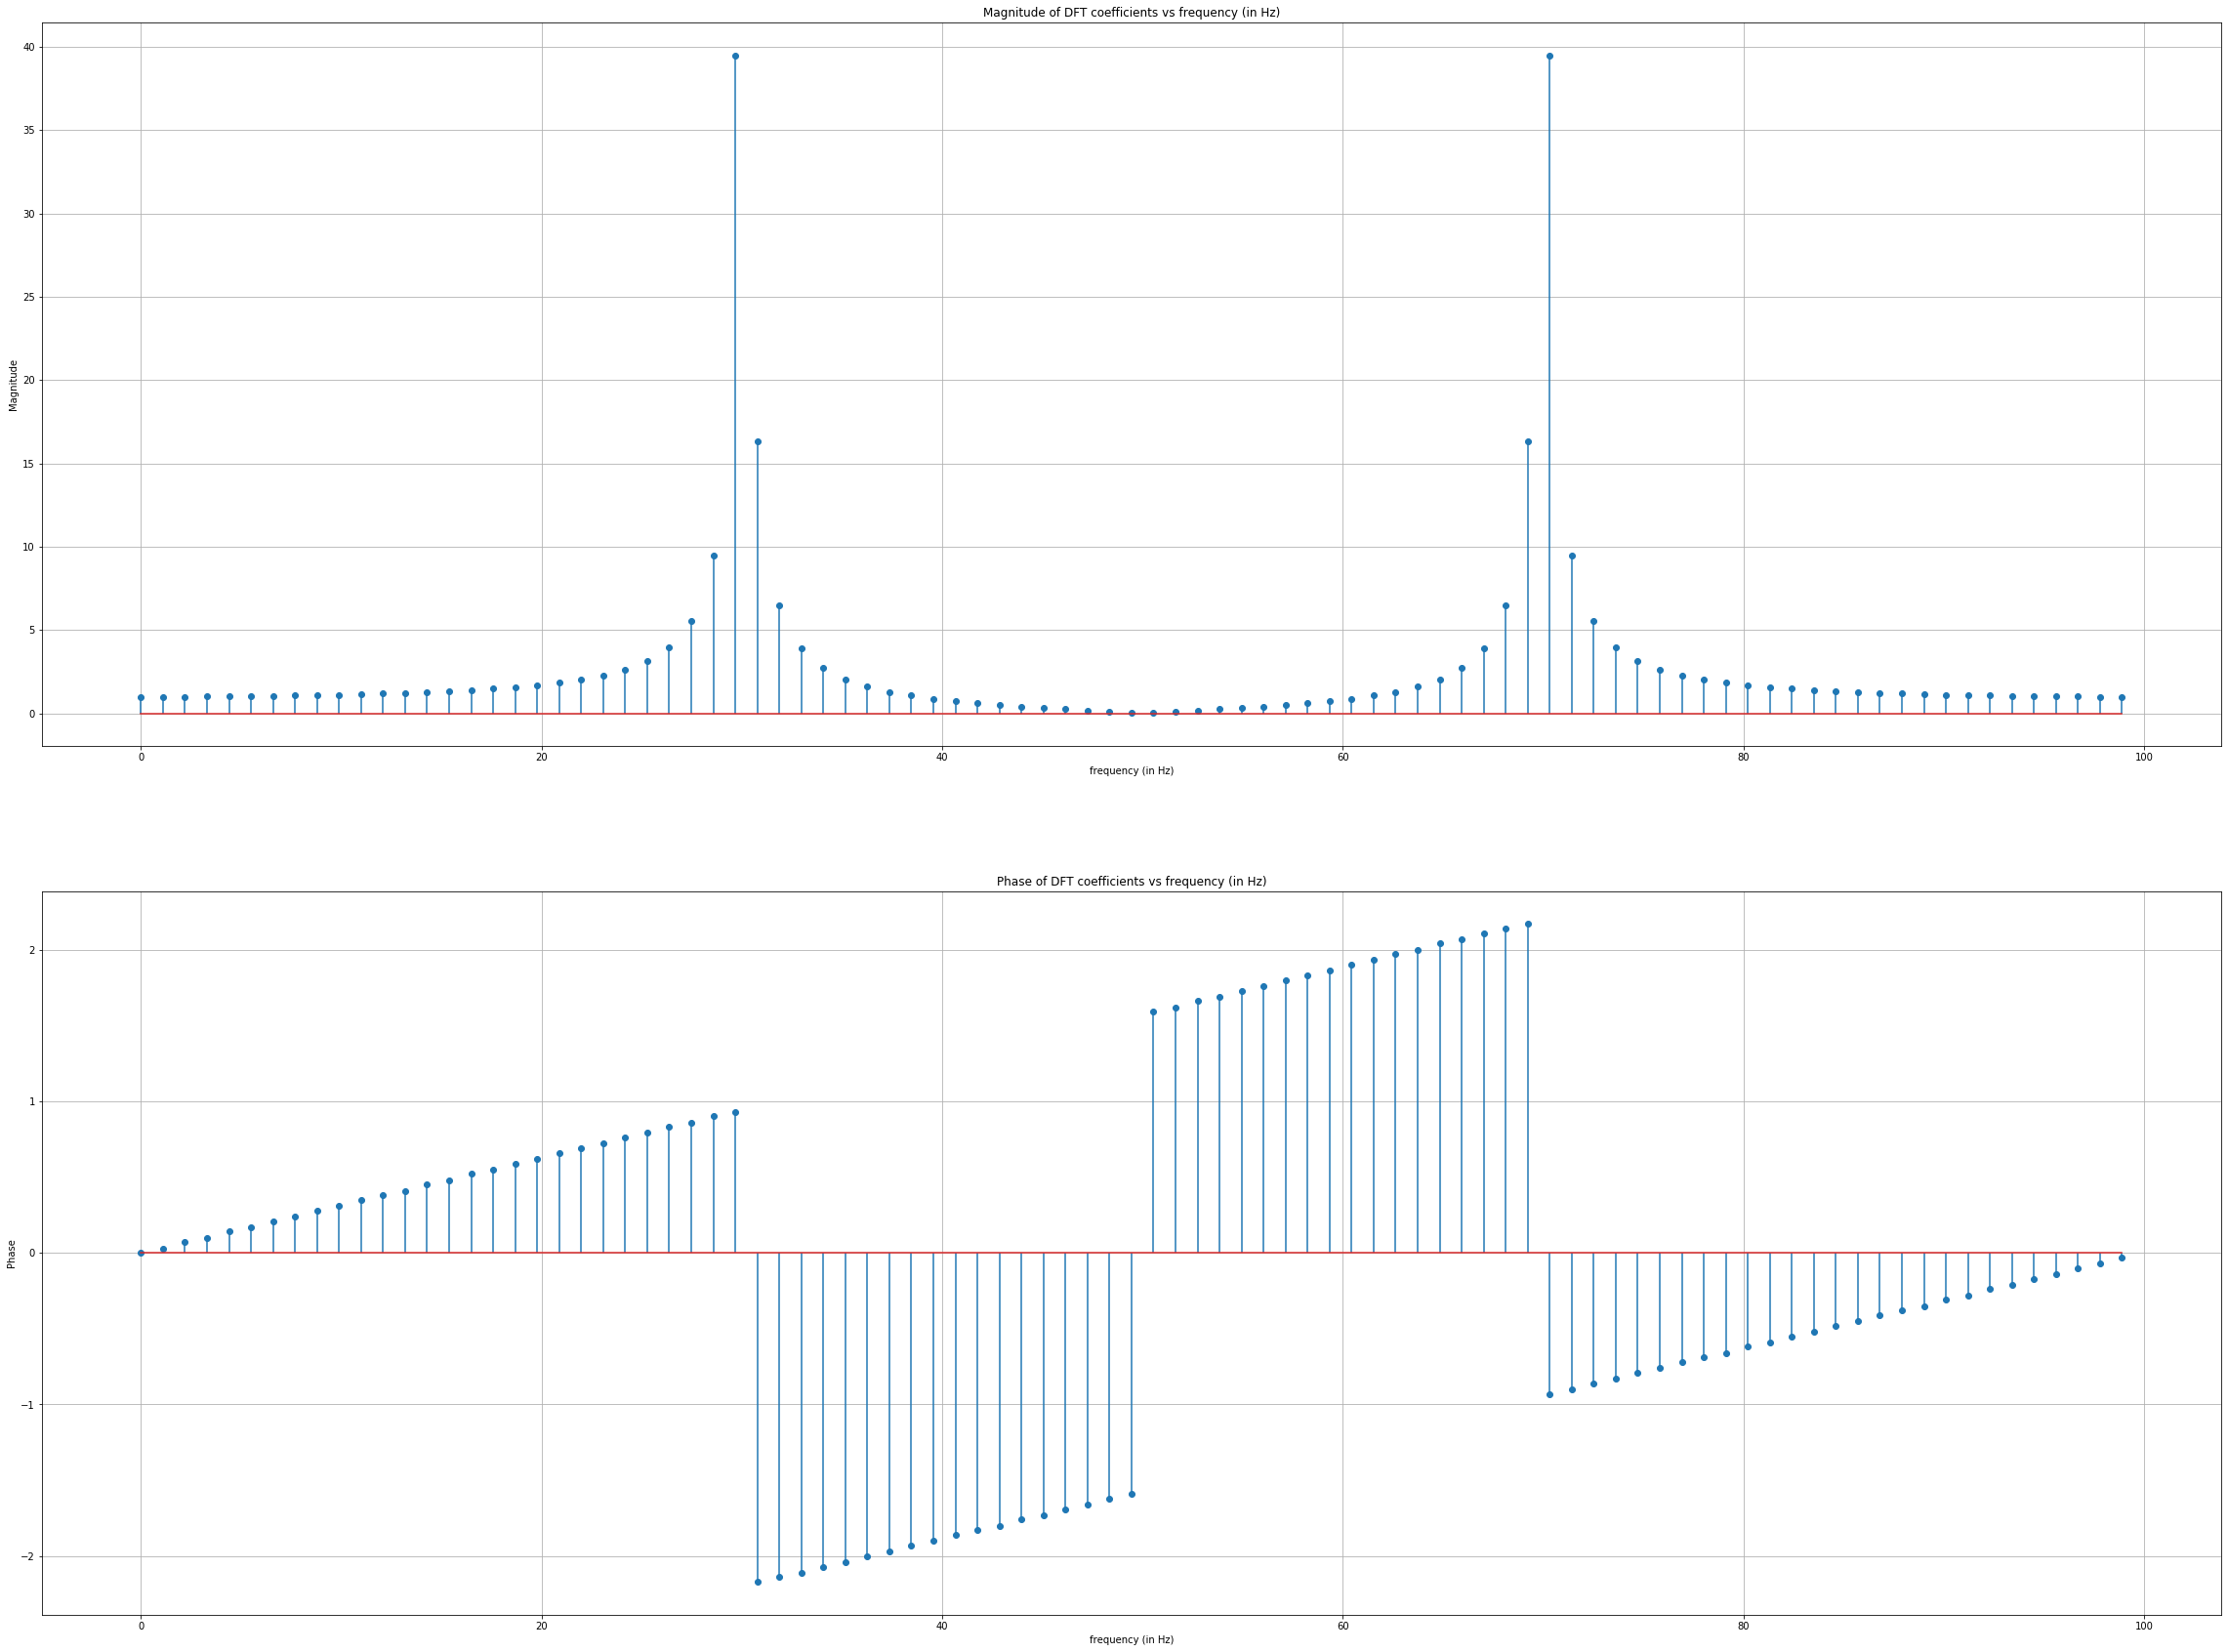

In [7]:
f1 = 30 # Frequency of sine wave signal
fs1 = 100 # Sampling frequency
T1 = 0.91 # in seconds
N1 = int(fs1*T1) # No. of samples of DFT
t1 = np.arange(0,T1,1/fs1)
x1 = np.cos(2*np.pi*f1*t1)
n1 = np.arange(N1)
X1_dft = DFT(x1,N1)
f_n = (n1*fs1)/N1 # since f=k/NTs

# For plotting the spectrum
titles = ['Magnitude of DFT coefficients vs frequency (in Hz)','Phase of DFT coefficients vs frequency (in Hz)']
ylabels = ['Magnitude','Phase']
yvalues = [np.round(np.abs(X1_dft),2),np.round(np.angle(X1_dft),2)]

fig,ax = plt.subplots(2,1,figsize=(40, 30))
for i in range(2):
    ax[i].stem(f_n,yvalues[i],use_line_collection=True)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('frequency (in Hz)')
    ax[i].set_ylabel(ylabels[i])
    ax[i].grid()

mag_35 = np.round(np.abs(X1_dft)[np.round(f_n)==35][0],2)
print('The magnitude of DFT at f=35Hz is',mag_35)

Consider the two sequences y = [1;-3; 1; 5] and x = [7;-7;-9;-3]. Does there exist a sequence h such that y is the circular convolution of x and h. Find h using DFT and IDFT.

In [8]:
x=np.array([1,-3,1,5])
y=np.array([7,-7,-9,-3])
h=circon(x,y)
print('circular convolution of x=',x,' and y=',y,'is h=',h)
X=DFT(x,len(x))
Y=DFT(y,len(y))
H=DFT(h,len(y))
H2=[]
for i in range(len(X)):
    t3r=X[i].real*Y[i].real-X[i].imag*Y[i].imag
    t3i=Y[i].imag*X[i].real+Y[i].real*X[i].imag
    H2.append(complex(float(t3r),float(t3i)))
h2=IDFT(H2,len(H2))
for i in range(len(X)):
    t1r="%.2f"%X[i].real
    t2r="%.2f"%Y[i].real
    t3r="%.2f"%H[i].real
    t4r="%.2f"%h2[i].real
    t1i="%.2f"%X[i].imag
    t2i="%.2f"%Y[i].imag
    t3i="%.2f"%H[i].imag
    t4i="%.2f"%h2[i].imag
    X[i]=complex(float(t1r),float(t1i))
    Y[i]=complex(float(t2r),float(t2i))
    H[i]=complex(float(t3r),float(t3i))
    h2[i]=complex(float(t4r),float(t4i))
    
print("\nDFT of x[n]=",x,"is X[k]=",X,"\nDFT of y[n]=",y," is Y[k]=",Y,"\nDFT of h[n]=",h," is H[k]=",H)
print("\nh calculated using circular convolution x[n]*y[n] is \nh[n]=",h,"\nh calculated using IDFT of X[k]xY[k]=H[k] is\nh[n]=",h2)


circular convolution of x= [ 1 -3  1  5]  and y= [ 7 -7 -9 -3] is h= [-28, -76, 4, 52]

DFT of x[n]= [ 1 -3  1  5] is X[k]= [(4+0j), (-0+8j), -0j, -8j] 
DFT of y[n]= [ 7 -7 -9 -3]  is Y[k]= [(-12+0j), (16+4j), (8-0j), (16-4j)] 
DFT of h[n]= [-28, -76, 4, 52]  is H[k]= [(-48+0j), (-32+128j), -0j, (-32-128j)]

h calculated using circular convolution x[n]*y[n] is 
h[n]= [-28, -76, 4, 52] 
h calculated using IDFT of X[k]xY[k]=H[k] is
h[n]= [(-28+0j), (-76+0j), (4+0j), (52+0j)]


# Energy Signal

In [9]:
n=np.arange(0,50,1)
x=[0.75**i for i in range(len(n))]
t1=0
t2=0
for i in x:
    t1+=i**2
print("Energy of the sequence x[n]=(3/4)^n*u[n] is =",t1)
X=DFT(x,len(x))
for i in X:
    t2+=abs(i)**2
t2=t2/len(x)
print("Energy of the sequence using DFT of x[n] is =",t2)

Energy of the sequence x[n]=(3/4)^n*u[n] is = 2.2857142857135524
Energy of the sequence using DFT of x[n] is = 2.2857142857135515


Compute the energy of the signal x[n] = (3/4)^n*u[n] for 0<=n<=50. If the DFT of this signal is X(k) then what is the energy of X(k) and how does it relate to that of x[n].

Is it possible to compute the DTFS coecients of the square wave men- tioned in Assignment-3 using the function written for DFT as mentioned above. If yes, then modify the function to compute the DTFS coefficients of the signal and show a labelled plot of the spectrum of these coefficients.

DFT function can be modified (as shown above) to calculate the DTFS coefficients of the periodic square wave

In [10]:
def DFT_modified(x,N):
    X = np.zeros(N,dtype='complex')
    for k in range(N):
        for n in range(N):
            X[k] += x[n]*np.exp((-1j*2*np.pi/N)*k*n)
    X = X.tolist()
    for i in range(3):
        X.extend(X)
    X = np.array(X)
    
    return X

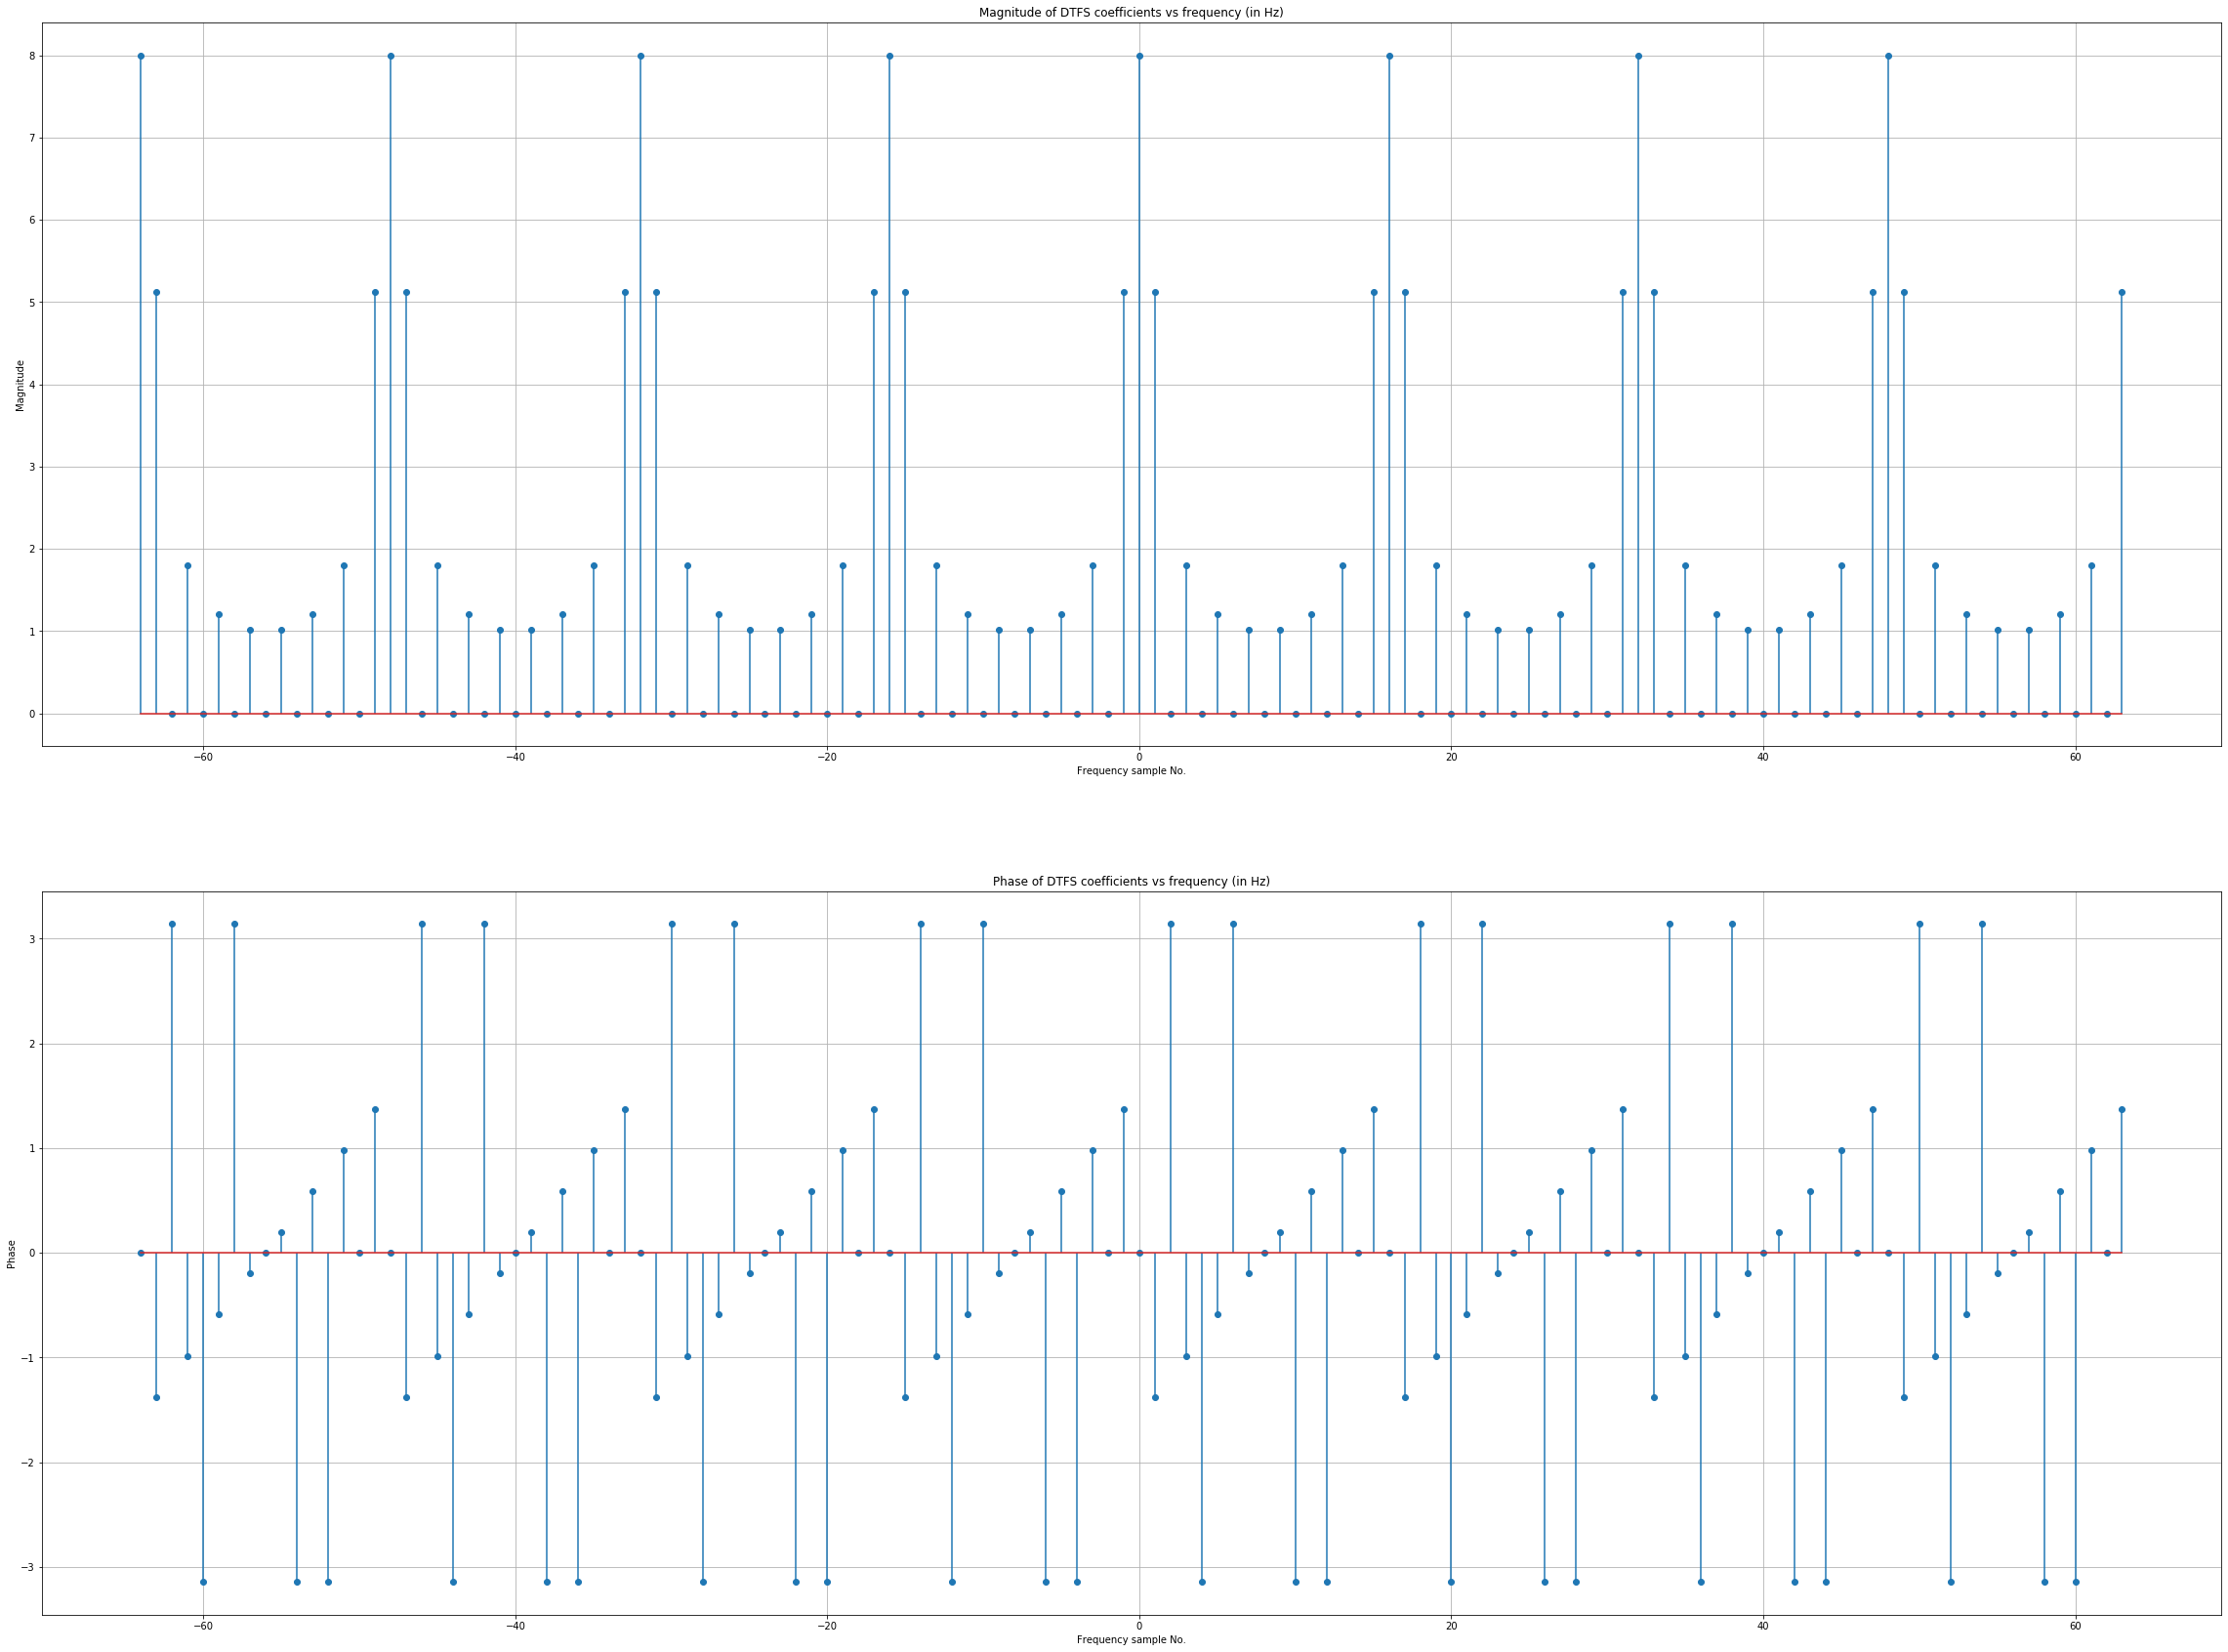

In [11]:
N = 16
x1 = np.zeros(N)
n1 = np.arange(N)
x1[(n1>=0) & (n1<N/2)] = 1
X1 = np.around(DFT_modified(x1,N),2)
f_n = np.arange(-4*N,4*N)

# For plotting the spectrum
titles = ['Magnitude of DTFS coefficients vs frequency (in Hz)','Phase of DTFS coefficients vs frequency (in Hz)']
ylabels = ['Magnitude','Phase']
yvalues = [np.abs(X1),np.angle(X1)]

fig,ax = plt.subplots(2,1,figsize=(40, 30))
for i in range(2):
    ax[i].stem(f_n,yvalues[i],use_line_collection=True)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Frequency sample No.')
    ax[i].set_ylabel(ylabels[i])
    ax[i].grid()

# Q2. Discrete Cosine Transform

Consider a signal x[n] = [8; 16; 24; 32; 40; 48; 56; 64] of length N = 8. Com- pute the DCT of this signal. Now keep only the first four DCT coefficients while discarding the rest and then compare its energy with that of x[n]. Compute the inverse DCT of the sequence obtained and plot it alongside x[n]. Also compute the mean square error between the two signals.

Computation of DCT of x[n], DCT compression and reconstruction of x[n]

Define DCT

In [12]:
def dct(x,N):
    y = np.zeros(N)
    for m in range(N):
        for n in range(N):
            if m==0:
                c = 1/np.sqrt(2)
            else:
                c = 1
            y[m] += x[n]*c*np.cos(((np.pi*m)/(2*N))*(2*n+1))
    y = y*np.sqrt(2/N)
    return X

Define IDCT

In [13]:
def idct(y,N):
    Y = np.zeros(N)
    for n in range(N):
        for m in range(N):
            if m==0:
                c = 1/np.sqrt(2)
            else:
                c = 1
            Y[n] += y[m]*c*np.cos(((np.pi*m)/(2*N))*(2*n+1))
    Y = Y*np.sqrt(2/N)
    return Y

In [14]:
x1 = np.array([8,16,24,32,40,48,56,64])
N1 = len(x1)
n1 = np.arange(N1)
y1_dct = dct(x1,N1)
y1_comp_dct = np.zeros(8)
energy_orig = np.sum(np.square(x1))
energy_comp_dct = np.sum(np.square(y1_comp_dct))
print('Energy of x[n] is',energy_orig, 'J')
print('Energy of x[n] and compressed DCT of x[n] are very close to each other. This means DCT can be used for compression as the energy of the signal is almost preserved after compression')


Energy of x[n] is 13056 J
Energy of x[n] and compressed DCT of x[n] are very close to each other. This means DCT can be used for compression as the energy of the signal is almost preserved after compression


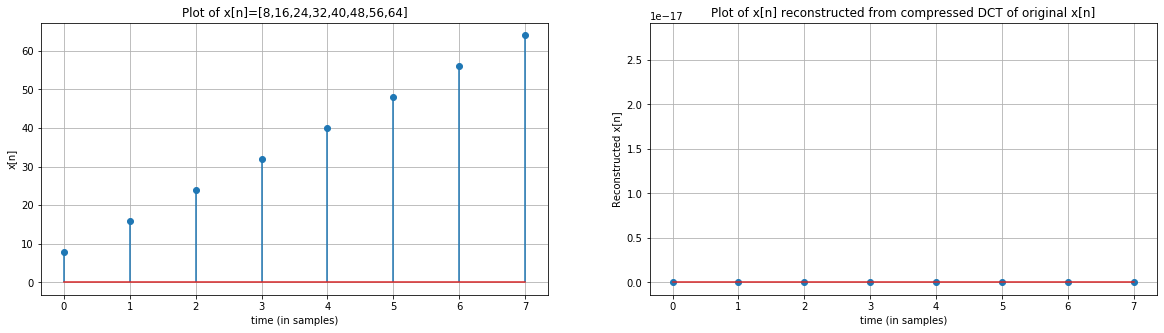

In [15]:
# For plotting the original x[n] and x[n] reconstructed from its compressed DCT
x1_recon_dct = idct(y1_comp_dct,N1)
titles = ['Plot of x[n]=[8,16,24,32,40,48,56,64]','Plot of x[n] reconstructed from compressed DCT of original x[n]']
ylabels = ['x[n]','Reconstructed x[n]']
yvalues = [x1,x1_recon_dct]

fig,ax = plt.subplots(1,2,figsize=(20, 5))
for i in range(2):
    ax[i].stem(n1,yvalues[i],use_line_collection=True)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('time (in samples)')
    ax[i].set_ylabel(ylabels[i])
    ax[i].grid()

In [16]:
y1_DFT = DFT(x1,N1)
y1_comp_DFT = np.zeros(8,dtype='complex')
y1_comp_DFT[0:4] = y1_DFT[0:4]
energy_orig = np.sum(np.square(np.abs(x1)))
energy_comp_DFT = np.sum(np.square(np.abs(y1_comp_DFT)))/N1
print('Energy of x[n] is',energy_orig, 'J')
print('Energy of compressed DFT of x[n] is',energy_comp_DFT,'J')
print('Energy of x[n] and compressed DFT of x[n] are very much different from each other. This means DFT cannot be used for compression as the energy of the signal cannot be preserved after compression')

Energy of x[n] is 13056 J
Energy of compressed DFT of x[n] is 11648.0 J
Energy of x[n] and compressed DFT of x[n] are very much different from each other. This means DFT cannot be used for compression as the energy of the signal cannot be preserved after compression


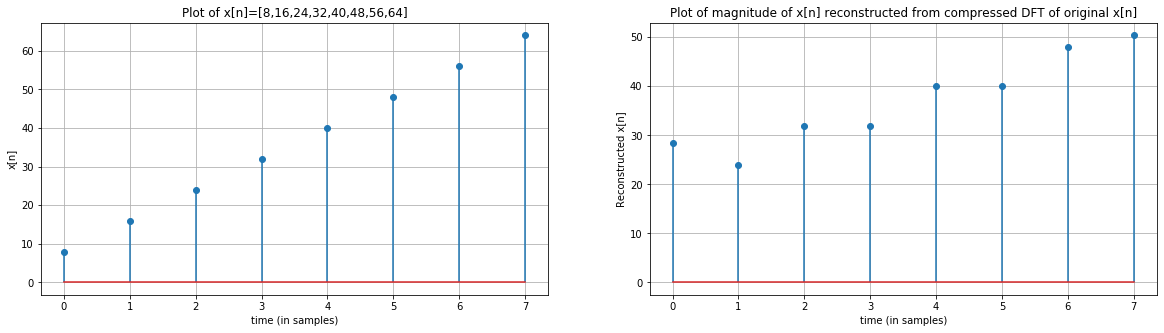

In [17]:
x1_recon_DFT = IDFT(y1_comp_DFT,N1)
titles = ['Plot of x[n]=[8,16,24,32,40,48,56,64]','Plot of magnitude of x[n] reconstructed from compressed DFT of original x[n]']
ylabels = ['x[n]','Reconstructed x[n]']
yvalues = [x1,np.abs(x1_recon_DFT)]

fig,ax = plt.subplots(1,2,figsize=(20, 5))
for i in range(2):
    ax[i].stem(n1,yvalues[i],use_line_collection=True)
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('time (in samples)')
    ax[i].set_ylabel(ylabels[i])
    ax[i].grid()